In [1]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime import SamplerV2 as Sampler

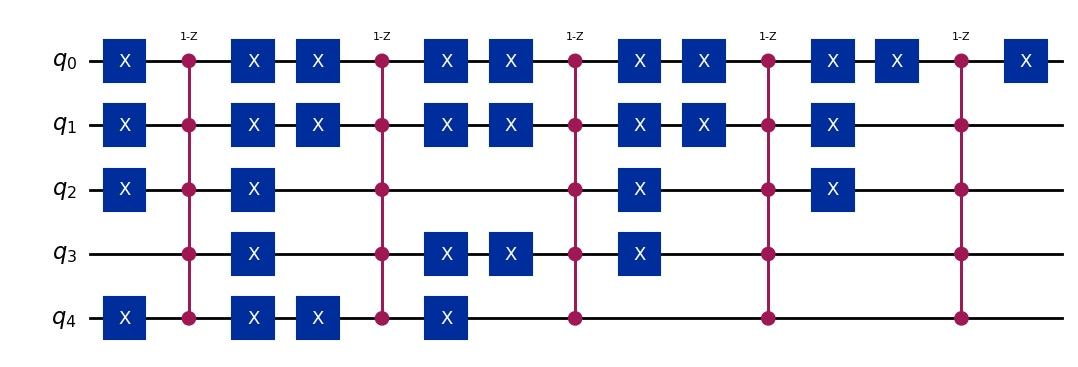

In [10]:
from typing import List


def grover_oracle(marked_states: List[str]):
    n = len(marked_states[0])
    qc = QuantumCircuit(n)
    for state in marked_states:
        zero_id = []
        for i in range(n):
            if state[i] == '1':
                continue
            zero_id.append(n - 1 - i)
        if len(zero_id) != 0:
            qc.x(zero_id)
        qc.compose(MCMT(ZGate(), n - 1, 1), inplace=True)
        if len(zero_id) != 0:
            qc.x(zero_id)
    return qc

marked_states = ['01000', '00100', '10100', '11000', '11110']
grover_oracle(marked_states).draw("mpl")

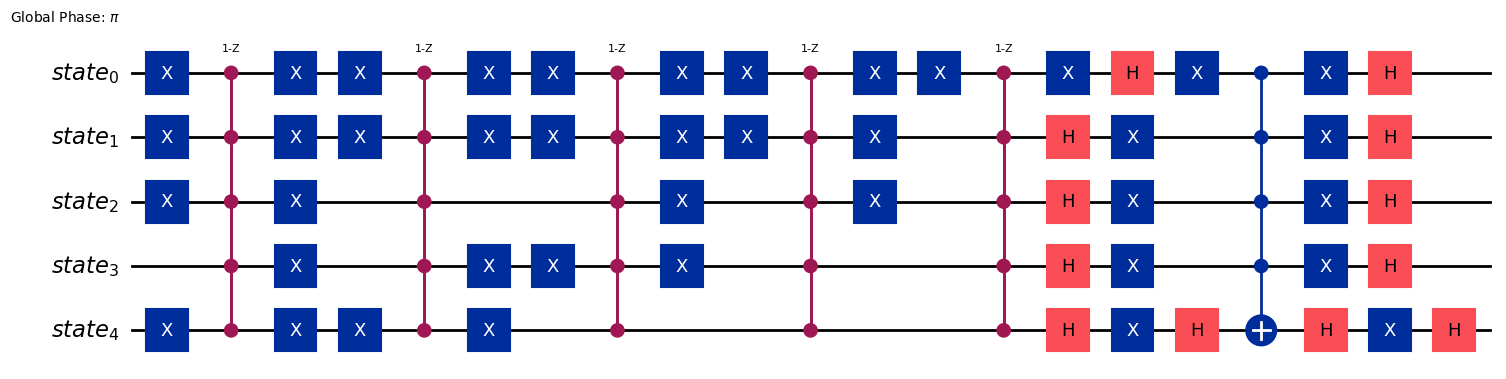

In [11]:
grover_op = GroverOperator(grover_oracle(marked_states))
grover_op.decompose().draw(output="mpl", style="iqp")

Optimal number of iterations: 1


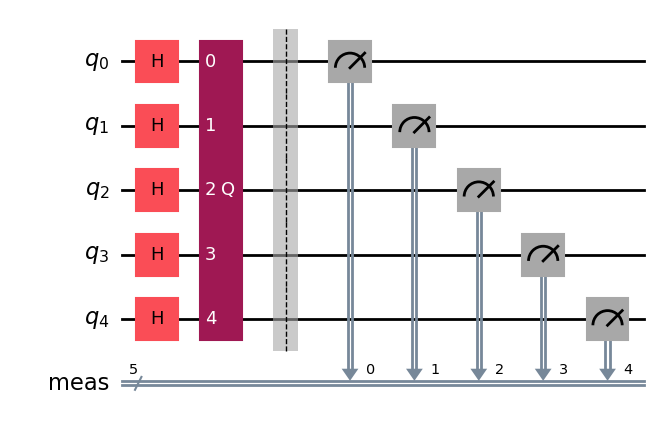

In [12]:
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)
print(f"Optimal number of iterations: {optimal_num_iterations}")
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

/tmp/ipykernel_73757/1638664164.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(qc, shot=1).result()


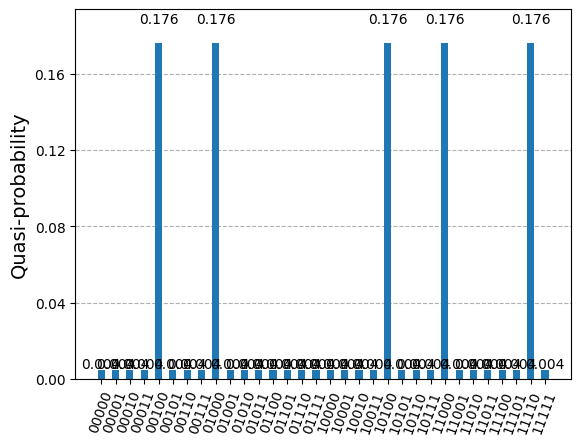

In [13]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
results = Sampler().run(qc, shot=1).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))